## Imports

In [46]:
import pandas as pd
import geopandas as gpd
import folium
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Bring in our file

In [88]:
# 2019 shapefile
data = pd.read_csv('../output/csv/agegroupshomevalue_2014_2019_cbsa.csv')

In [89]:
data.head(3)

,CBSA,GEOID,total,child,taxbase,O65,Pchild,Ptaxbase,PO65,homevalue,...,totalpercchange,O65sharechange,taxbasesharechange,childsharechange,O65realchange,taxbaserealchange,childrealchange,totalrealchange,homepercchange,homerealchange
0,"Big Stone Gap, VA Micro Area",310M500US13720,42456,8403,26596,7457,19.8,62.6,17.6,86200,...,-29.82,2.2,-1.5,-0.7,-1867,-12204,-3972,-18043,4.11,3400
1,"Billings, MT Metro Area",310M500US13740,179071,41435,106634,31002,23.1,59.5,17.3,227900,...,9.93,2.2,-2.1,-0.2,6360,6358,3461,16179,21.81,40800
2,"Binghamton, NY Metro Area",310M500US13780,241874,47899,148264,45711,19.8,61.3,18.9,117600,...,-2.96,2.0,-1.4,-0.6,3571,-8059,-2899,-7387,8.09,8800


In [90]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CBSA                859 non-null    object 
 1   GEOID               859 non-null    object 
 2   total               859 non-null    int64  
 3   child               859 non-null    int64  
 4   taxbase             859 non-null    int64  
 5   O65                 859 non-null    int64  
 6   Pchild              859 non-null    float64
 7   Ptaxbase            859 non-null    float64
 8   PO65                859 non-null    float64
 9   homevalue           859 non-null    int64  
 10  O*total             859 non-null    int64  
 11  O*child             859 non-null    int64  
 12  O*taxbase           859 non-null    int64  
 13  O*O65               859 non-null    int64  
 14  O*Pchild            859 non-null    float64
 15  O*Ptaxbase          859 non-null    float64
 16  O*PO65  

## Bring in shapefile to join here for areas

In [91]:
#extract GeoDataFrame from Tiger
url= 'https://www2.census.gov/geo/tiger/TIGER2019/CBSA/tl_2019_us_cbsa.zip'
geo = gpd.read_file(url)
geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CSAFP     550 non-null    object  
 1   CBSAFP    938 non-null    object  
 2   GEOID     938 non-null    object  
 3   NAME      938 non-null    object  
 4   NAMELSAD  938 non-null    object  
 5   LSAD      938 non-null    object  
 6   MEMI      938 non-null    object  
 7   MTFCC     938 non-null    object  
 8   ALAND     938 non-null    int64   
 9   AWATER    938 non-null    int64   
 10  INTPTLAT  938 non-null    object  
 11  INTPTLON  938 non-null    object  
 12  geometry  938 non-null    geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 95.4+ KB


In [92]:
geo['CBSAFP'] = geo['CBSAFP'].astype(int)

In [93]:
data_geo = geo.merge(data, left_on='CBSAFP', right_on='CBSAFIPS')

In [94]:
data_geo.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 859 entries, 0 to 858
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CSAFP               497 non-null    object  
 1   CBSAFP              859 non-null    int32   
 2   GEOID_x             859 non-null    object  
 3   NAME                859 non-null    object  
 4   NAMELSAD            859 non-null    object  
 5   LSAD                859 non-null    object  
 6   MEMI                859 non-null    object  
 7   MTFCC               859 non-null    object  
 8   ALAND               859 non-null    int64   
 9   AWATER              859 non-null    int64   
 10  INTPTLAT            859 non-null    object  
 11  INTPTLON            859 non-null    object  
 12  geometry            859 non-null    geometry
 13  CBSA                859 non-null    object  
 14  GEOID_y             859 non-null    object  
 15  total               859 non-null

In [95]:
data_geo = data_geo.drop(columns = ['CSAFP','CBSAFP','GEOID_y','NAME','Area','Name','NAMELSAD','MEMI','MTFCC','INTPTLAT','INTPTLON'])

In [96]:
data_geo = data_geo.rename(columns={'LSAD':'Micro_Metro','GEOID_x':'GEOID'})

In [97]:
data_geo.head(3)

,GEOID,Micro_Metro,ALAND,AWATER,geometry,CBSA,total,child,taxbase,O65,...,totalpercchange,O65sharechange,taxbasesharechange,childsharechange,O65realchange,taxbaserealchange,childrealchange,totalrealchange,homepercchange,homerealchange
0,12020,M1,2654601832,26140309,"POLYGON ((-83.53739 33.96591, -83.53184 33.968...","Athens-Clarke County, GA Metro Area",208457,42122,139587,26748,...,6.20,1.9,-1.7,-0.2,5284,4799,2087,12170,12.67,20100
1,12100,M1,1438776649,301268696,"POLYGON ((-74.85675 39.42076, -74.85670 39.420...","Atlantic City-Hammonton, NJ Metro Area",266105,57085,162363,46657,...,-3.35,2.6,-1.4,-1.1,5500,-9486,-5234,-9220,-5.34,-12300
2,12140,M2,939731962,2657419,"POLYGON ((-85.19295 41.38001, -85.19296 41.381...","Auburn, IN Micro Area",42927,10472,25677,6778,...,1.43,1.8,-0.8,-1.1,871,43,-308,606,14.67,15900


In [98]:
data_geo['ALAND'] = data_geo['ALAND'] * 0.0000003861
data_geo['AWATER'] = data_geo['AWATER'] * 0.0000003861

In [99]:
data_geo['popdensity14'] = data_geo['O*total']/data_geo['ALAND']
data_geo['popdensity19'] = data_geo['O*total']/data_geo['ALAND']
data_geo['elderlypopdensity14'] = data_geo['O*O65']/data_geo['ALAND']
data_geo['elderlypopdensity19'] = data_geo['O65']/data_geo['ALAND']
data_geo['tbdensity14'] = data_geo['O*taxbase']/data_geo['ALAND']
data_geo['tbdensity19'] = data_geo['taxbase']/data_geo['ALAND']
data_geo['childdensity14'] = data_geo['O*child']/data_geo['ALAND']
data_geo['childdensity19'] = data_geo['child']/data_geo['ALAND']

###### Convert land and water areas to proper units.

We have this in square meters, so the converstion factor is 0.0000003861 to get this to square miles.

## Check out some data shapes

First we're looking at two percent changes together, this is pretty linear which makes sense.

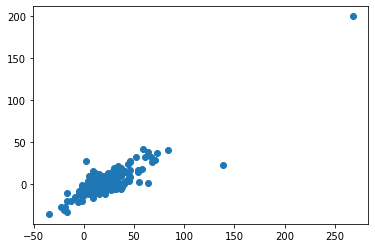

In [100]:
plt.scatter(data_geo['O65percchange'], data_geo['taxbasepercchange'])

I want to see what a real change versus percent change in 65+ looks like next.

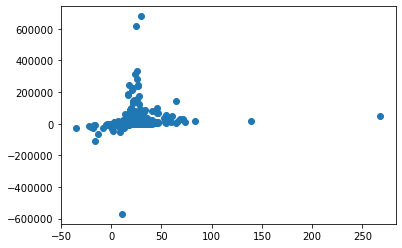

In [101]:
plt.scatter(data_geo['O65percchange'], data_geo['totalrealchange'])

Now let's see about share change versus percent then real change.

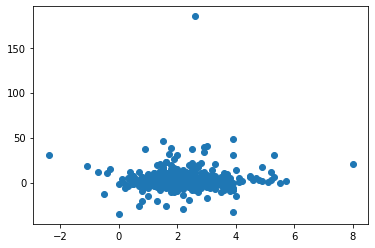

In [102]:
plt.scatter(data_geo['O65sharechange'], data_geo['totalpercchange'])

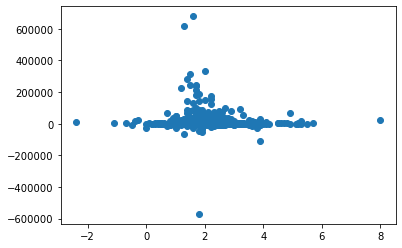

In [103]:
plt.scatter(data_geo['O65sharechange'], data_geo['totalrealchange'])

We're getting some interesting shapes here - now I'm going to bring in the home value. First we'll do 65+ percent change versus percent change in home value.

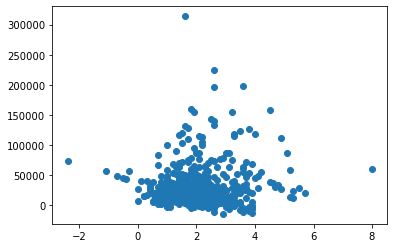

In [105]:
plt.scatter(data_geo['O65sharechange'], data_geo['homerealchange'])

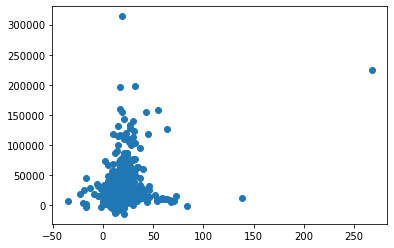

In [106]:
plt.scatter(data_geo['O65percchange'], data_geo['homerealchange'])

C:\Users\jmccall\Anaconda3\envs\geospatial\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


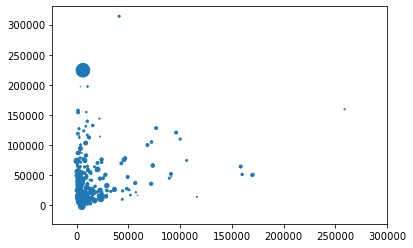

In [120]:
plt.scatter(data_geo['O65realchange'], data_geo['homerealchange'], data_geo['totalpercchange'])

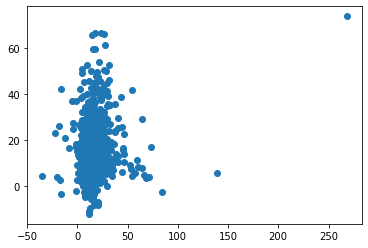

In [108]:
plt.scatter(data_geo['O65percchange'], data_geo['homepercchange'])

In [109]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [112]:
Area_predicted = km.fit_predict(data_geo[['O65sharechange','homerealchange']])
Area_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,

In [113]:
data_geo['cluster']= Area_predicted
data_geo.head()

,GEOID,Micro_Metro,ALAND,AWATER,geometry,CBSA,total,child,taxbase,O65,...,homerealchange,popdensity14,popdensity19,elderlypopdensity14,elderlypopdensity19,tbdensity14,tbdensity19,childdensity14,childdensity19,cluster
0,12020,M1,1024.941767,10.092773,"POLYGON ((-83.53739 33.96591, -83.53184 33.968...","Athens-Clarke County, GA Metro Area",208457,42122,139587,26748,...,20100,191.510392,191.510392,20.941678,26.097092,131.507959,136.190176,39.060756,41.096969,0
1,12100,M1,555.511664,116.319844,"POLYGON ((-74.85675 39.42076, -74.85670 39.420...","Atlantic City-Hammonton, NJ Metro Area",266105,57085,162363,46657,...,-12300,495.624157,495.624157,74.088453,83.989236,309.352640,292.276491,112.183063,102.761119,0
2,12140,M2,362.830511,1.026029,"POLYGON ((-85.19295 41.38001, -85.19296 41.381...","Auburn, IN Micro Area",42927,10472,25677,6778,...,15900,116.641238,116.641238,16.280329,18.680899,70.650067,70.768580,29.710842,28.861961,0
3,12180,M2,691.578656,172.087923,"POLYGON ((-76.73797 42.96129, -76.73771 42.961...","Auburn, NY Micro Area",77425,15394,47819,14212,...,19000,114.926913,114.926913,18.574894,20.550085,72.259315,69.144702,24.092704,22.259218,0
4,12220,M1,607.534052,8.311367,"POLYGON ((-85.29322 32.73073, -85.28826 32.730...","Auburn-Opelika, AL Metro Area",161152,34388,108068,18696,...,19200,243.262085,243.262085,23.478519,30.773584,166.321541,177.879741,53.462024,56.602589,0


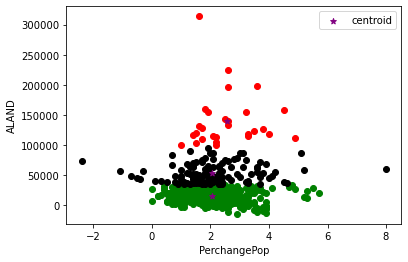

In [116]:
df1= data_geo[data_geo.cluster==0]
df2= data_geo[data_geo.cluster==1]
df3= data_geo[data_geo.cluster==2]

plt.scatter(df1['O65sharechange'],df1['homerealchange'], color='green')
plt.scatter(df2['O65sharechange'],df2['homerealchange'], color= 'red')
plt.scatter(df3['O65sharechange'],df3['homerealchange'], color= 'black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('PerchangePop')
plt.ylabel('ALAND')
plt.legend()

Try clustering based on 3 variables.

In [119]:
#create cluster based on 3 variables
area_predicted = km.fit_predict(data_geo[['O65sharechange','totalpercchange','homerealchange']])
area_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [122]:
data_geo['cluster']= area_predicted
data_geo.head()

,GEOID,Micro_Metro,ALAND,AWATER,geometry,CBSA,total,child,taxbase,O65,...,homerealchange,popdensity14,popdensity19,elderlypopdensity14,elderlypopdensity19,tbdensity14,tbdensity19,childdensity14,childdensity19,cluster
0,12020,M1,1024.941767,10.092773,"POLYGON ((-83.53739 33.96591, -83.53184 33.968...","Athens-Clarke County, GA Metro Area",208457,42122,139587,26748,...,20100,191.510392,191.510392,20.941678,26.097092,131.507959,136.190176,39.060756,41.096969,0
1,12100,M1,555.511664,116.319844,"POLYGON ((-74.85675 39.42076, -74.85670 39.420...","Atlantic City-Hammonton, NJ Metro Area",266105,57085,162363,46657,...,-12300,495.624157,495.624157,74.088453,83.989236,309.352640,292.276491,112.183063,102.761119,0
2,12140,M2,362.830511,1.026029,"POLYGON ((-85.19295 41.38001, -85.19296 41.381...","Auburn, IN Micro Area",42927,10472,25677,6778,...,15900,116.641238,116.641238,16.280329,18.680899,70.650067,70.768580,29.710842,28.861961,0
3,12180,M2,691.578656,172.087923,"POLYGON ((-76.73797 42.96129, -76.73771 42.961...","Auburn, NY Micro Area",77425,15394,47819,14212,...,19000,114.926913,114.926913,18.574894,20.550085,72.259315,69.144702,24.092704,22.259218,0
4,12220,M1,607.534052,8.311367,"POLYGON ((-85.29322 32.73073, -85.28826 32.730...","Auburn-Opelika, AL Metro Area",161152,34388,108068,18696,...,19200,243.262085,243.262085,23.478519,30.773584,166.321541,177.879741,53.462024,56.602589,0


C:\Users\jmccall\Anaconda3\envs\geospatial\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


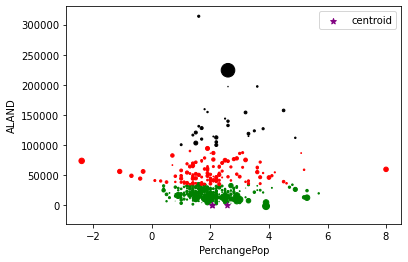

In [123]:
df1= data_geo[data_geo.cluster==0]
df2= data_geo[data_geo.cluster==1]
df3= data_geo[data_geo.cluster==2]

plt.scatter(df1['O65sharechange'],df1['homerealchange'],df1['totalpercchange'], color='green')
plt.scatter(df2['O65sharechange'],df2['homerealchange'],df2['totalpercchange'], color= 'red')
plt.scatter(df3['O65sharechange'],df3['homerealchange'],df3['totalpercchange'], color= 'black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('PerchangePop')
plt.ylabel('ALAND')
plt.legend()